In [1]:
! pip install antsys

You should consider upgrading via the 'c:\users\pajag\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
from antsys import AntSystem
from antsys import AntWorld
import random
import numpy as np

C:\Users\pajag\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pajag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4sp5sua7cbgxueoc35yp2asoicyyeqzz.gfortran-win_amd64.dll
C:\Users\pajag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
cities = []
for city in range(10):
  x = random.uniform(-100, 100)
  y = random.uniform(-100, 100)
  cities.append((city, x, y))

In [4]:
cities

[(0, -1.2227052049164797, -76.18270883004425),
 (1, -3.706565465305374, -3.4800927616827124),
 (2, -95.99369713230617, 32.26413559685781),
 (3, -84.52629641004901, -18.036062085528044),
 (4, -70.13672698268354, -79.81120584715373),
 (5, -79.07732156530578, 67.34061153831613),
 (6, 79.38192468787724, -47.1580841116316),
 (7, 78.47560366885793, -90.31065610204605),
 (8, -23.679327754135684, 39.352566152067794),
 (9, -52.81861652476019, -24.120741949590368)]

In [5]:
def salesman_rules(start, end):
  return [((start[1]-end[1])**2+(start[2]-end[2])**2)**0.5]

In [6]:
def salesman_cost(path):
  cost = 0
  for edge in path:
    cost+=edge.info
  return cost

In [7]:
def salesman_info(path, candidate):
  return candidate.info

In [8]:
new_world = AntWorld(cities, salesman_rules, salesman_cost, salesman_info)

In [9]:
ant_opt = AntSystem(world=new_world, n_ants=50)

In [10]:
ant_opt.optimize(50,20)

| iter |         min        |         max        |        best        |
|     1|             696.422|             1130.68|             696.422|
|     2|             715.209|              1141.1|             696.422|
|     3|             677.322|             1320.26|             677.322|
|     4|             694.085|             1143.84|             677.322|
|     5|              577.45|             1180.99|              577.45|
|     6|             652.516|             1162.93|              577.45|
|     7|             706.616|             1066.38|              577.45|
|     8|             643.868|                1163|              577.45|
|     9|             660.598|             1266.44|              577.45|
|    10|             688.422|             1180.41|              577.45|
|    11|              577.45|             1118.19|              577.45|
|    12|             667.331|             1176.32|              577.45|
|    13|             682.892|             1195.46|              

In [32]:
ant_opt.g_best[1]

[(2, -95.99369713230617, 32.26413559685781),
 (5, -79.07732156530578, 67.34061153831613),
 (8, -23.679327754135684, 39.352566152067794),
 (1, -3.706565465305374, -3.4800927616827124),
 (6, 79.38192468787724, -47.1580841116316),
 (7, 78.47560366885793, -90.31065610204605),
 (0, -1.2227052049164797, -76.18270883004425),
 (4, -70.13672698268354, -79.81120584715373),
 (9, -52.81861652476019, -24.120741949590368),
 (3, -84.52629641004901, -18.036062085528044)]

In [44]:
l = list(ant_opt.g_best[1])
x_coords = [coord[1] for coord in l]
y_coords = [coord[2] for coord in l]
point_labels = [coord[0] for coord in l]

In [45]:
point_labels

[2, 5, 8, 1, 6, 7, 0, 4, 9, 3]

In [41]:
x_coords

[-95.99369713230617,
 -79.07732156530578,
 -23.679327754135684,
 -3.706565465305374,
 79.38192468787724,
 78.47560366885793,
 -1.2227052049164797,
 -70.13672698268354,
 -52.81861652476019,
 -84.52629641004901]

In [42]:
y_coords

[32.26413559685781,
 67.34061153831613,
 39.352566152067794,
 -3.4800927616827124,
 -47.1580841116316,
 -90.31065610204605,
 -76.18270883004425,
 -79.81120584715373,
 -24.120741949590368,
 -18.036062085528044]

In [18]:
import matplotlib.pyplot as plt

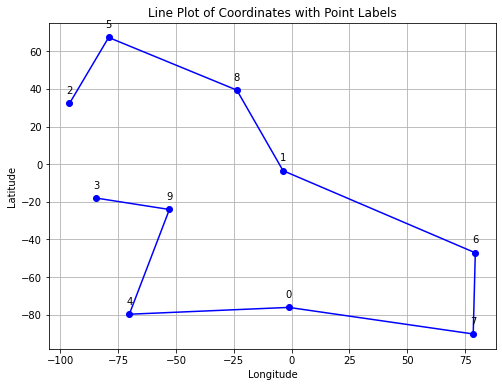

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Line Plot of Coordinates with Point Labels')
plt.grid(True)
for i, label in enumerate(point_labels):
    plt.annotate(label, (x_coords[i], y_coords[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()